In [3]:
#import các thư viện cần thiết 
import numpy as np 
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
class Graph: 
    def __init__(self):
        """Khởi tạo đồ thị với danh sách kề rỗng"""
        self.graph = {}
    
    def load_csv (self, filename):
        """
        Đọc đồ thị từ file csv
        Mỗi dòng bao gồm (v_from, v_to, weight)

        """
        graph_csv = pd.read_csv(filename)
        for _, row in graph_csv.iterrows(): 
            #Sử dụng iterrows để truy cập các cột theo tên để không bị lỗi chuyển thành int
            v_from = row['v_from']
            v_to = row['v_to']
            weight = row['weight']

            #Đồ thị VÔ HƯỚNG nên khi thêm cạnh vào đồ thị thì phải thêm cả HAI CHIỀU
            print(f"Adding edge from {v_from} to {v_to} with weight {weight}")  # Debug line
            self.add_edge(v_from, v_to, weight)
    
    def add_edge (self, v_from, v_to, weight):
        """ 
        Thêm cạnh vào danh sách kề của đồ thị 
        Nếu đỉnh chưa tồn tại trong danh sách kề thì tạo một danh sách kề mới
        """
        if v_from not in self.graph:
            self.graph[v_from] = []

        if v_to not in self.graph:
            self.graph[v_to] = []
        
        #Thêm cạnh HAI CHIỀU vì là đồ thị VÔ HƯỚNG 
        self.graph[v_from].append((v_to, weight))
        self.graph[v_to].append((v_from, weight))
    
    def Dijkstra(self, start, end):
        
        dist = {node: (float('inf'), None) for node in self.graph}  
        
        dist[start] = (0, None)
        
        #Danh sách khoảng cách
        list_dist = [(0, start)] #(Khoảng cách, đỉnh)

        #Danh sách đỉnh đã duyệt
        closed = set()

        while list_dist:
            current_dist, current_node = heapq.heappop(list_dist)
            closed.add(current_node)

            #Nếu khoảng cách hiện tại (current_dist) lớn hơn khoảng cách đã duyệt -> bỏ qua nó
            if current_dist > dist[current_node][0]:
                continue
            
            #Duyệt qua các cạnh của đỉnh hiện tại 
            for neighbor, weight in self.graph[current_node]:
                if neighbor not in closed: 
                    #Tính khoảng cách từ đỉnh hiện tại đến láng giềng
                    new_dist = current_dist + weight
            
                    #Nếu khoảng cách mới nhỏ hơn khoảng cách đã tìm thấy -> cập nhật 
                    if new_dist < dist[neighbor][0]:
                        dist[neighbor] = (new_dist, current_node)
                        heapq.heappush(list_dist, (new_dist, neighbor))
        
        return dist
    
    def path(self, distance, start, end):
        #Lưu đường đi từ đích đến điểm bắt đầu 
        path = []
        node = end #node đầu tiên là điểm đích 
        
        while node is not None:
            path.append(node)
            node = distance[node][1]

        #Đảo ngược danh sách để danh sách từ start -> end
        path = path[::-1]

        #Chi phí tới điểm đích 
        cost = distance[end][0]

        return path, cost

    def print_shortest_path(self, start, end):
        distance = self.Dijkstra(start, end)

        if distance[end][0] == float('inf'): 
            print(f'Không có đường đi từ {start} đến {end}.')

        else:
            path, cost = self.path(distance, start, end)
            path_str = '->'.join(map(str, path)) #Thêm mũi tên vào danh sách

            print(f'Đường đi ngắn nhất từ {start} đến {end} là: {path_str}')
            print(f'Chi phí đường đi là: {cost}')

            self.visualize_graph(path)
    
    def visualize_graph(self, path = None):
        """ 
        1. Hiển thị đồ thị 
        2. Tô đậm đường đi ngắn nhất
        
        """

        G = nx.Graph()

        #Thêm cạnh vào đồ thị 
        for v_from in self.graph:
            for v_to, weight in self.graph[v_from]:
                G.add_edge(v_from, v_to, weight = weight)
        
        position = nx.spring_layout(G) #Vị trí cho các node
        plt.figure(figsize = (7, 7))

        #Vẽ node và cạnh 
        node_color = [(0.77, 0.69, 1)] * len(G.nodes)
        nx.draw_networkx_nodes(G, position, node_size = 400, node_color= node_color)
        nx.draw_networkx_edges(G, position, edgelist= G.edges(), width= 1, alpha= 0.5)

        #Vẽ trọng số trên cạnh 
        edge_labels = {(v_to, v_from): d['weight'] for v_to, v_from, d in G.edges(data = True)}
        nx.draw_networkx_edge_labels(G, position, edge_labels= edge_labels, font_size= 10, font_family= 'sans-serif')

        #Vẽ tên các node
        nx.draw_networkx_labels(G, position, font_size = 12, font_color= (0.07, 0, 0.62), font_family= 'sans-serif')

        #Tô màu đường đi được cung cấp 
        if path: 
            path_edges = list(zip(path, path[1:]))
            edges_color = [(0.29, 0.26, 0.89)] * len(G.edges)
            nx.draw_networkx_edges(G, position, edgelist= path_edges, width = 3, edge_color= edges_color)
            nx.draw_networkx_edge_labels(G, position, edge_labels= edge_labels, font_size= 10, font_family= 'sans-serif')

        plt.title('Đồ thị' + (' với đường đi ngắn nhất được tô màu' if path else ''))
        plt.show();

In [58]:
graph = Graph()
graph.load_csv(r'C:\Users\ASUS\Documents\GitHub\Final-LTPTDL\Graph.csv')

Adding edge from A to C with weight 9
Adding edge from A to F with weight 20
Adding edge from A to D with weight 7
Adding edge from A to E with weight 13
Adding edge from C to H with weight 6
Adding edge from D to H with weight 8
Adding edge from D to E with weight 4
Adding edge from E to K with weight 4
Adding edge from E to I with weight 3
Adding edge from F to I with weight 6
Adding edge from F to G with weight 4
Adding edge from H to K with weight 5
Adding edge from K to B with weight 6
Adding edge from I to K with weight 9
Adding edge from I to B with weight 5


Đường đi ngắn nhất từ A đến B là: A->D->E->I->B
Chi phí đường đi là: 19


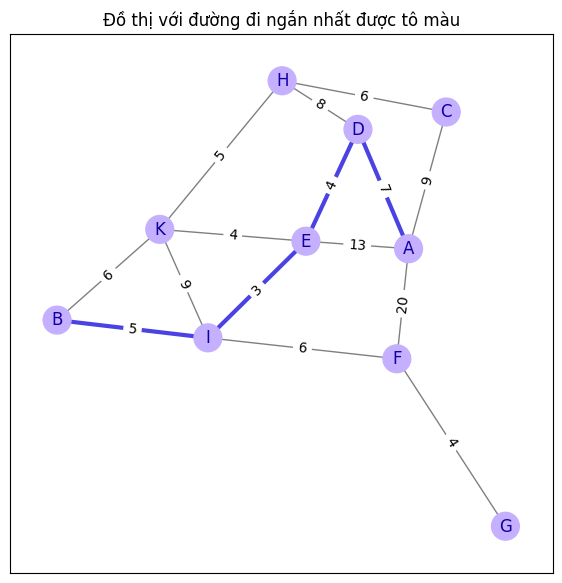

In [59]:
start = 'A'
end = 'B'

graph.print_shortest_path(start, end)